<a href="https://colab.research.google.com/github/Dhanyajubin123/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

# 1. Loaded the Iris dataset
data = load_iris()
iris_df = pd.DataFrame(data=data.data, columns=data.feature_names)
data


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# Droped the species column
print("Dataset Preview:")
print(iris_df.head())

# Normalized the dataset using StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Text(0, 0.5, 'Principal Component 2')

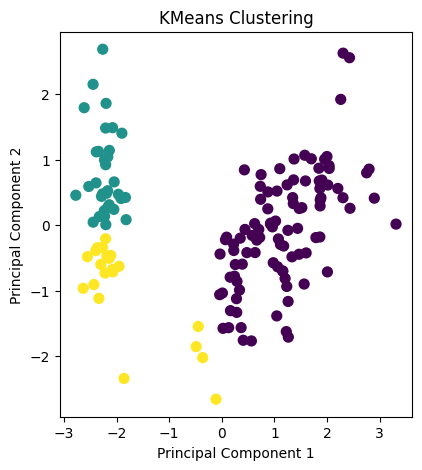

In [6]:
# 2. Implemented Clustering Algorithm

# A) Applied KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(iris_scaled)

# Visualized KMeans clusters
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("KMeans Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


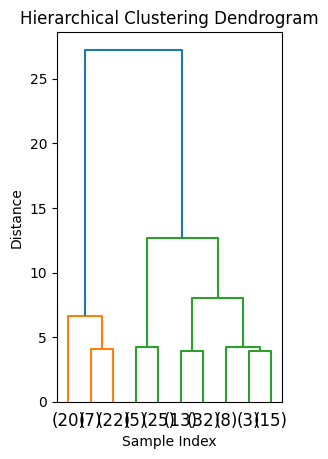

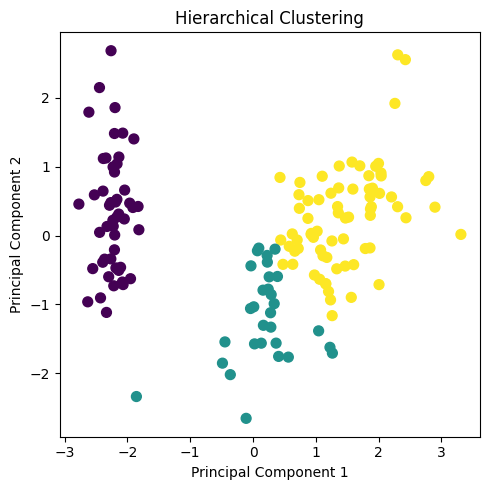

In [7]:
# B) Applied Hierarchical Clustering
linkage_matrix = linkage(iris_scaled, method='ward')

# Dendrogram
plt.subplot(1, 2, 2)
dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")

# Assigned cluster labels from Hierarchical Clustering
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Visualized clusters for Hierarchical Clustering
plt.figure(figsize=(5, 5))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=hierarchical_labels, cmap='viridis', s=50)
plt.title("Hierarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()
